In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee


In [2]:
def U(x,gamma=8):
    return(gamma*(x**2-1)**2)

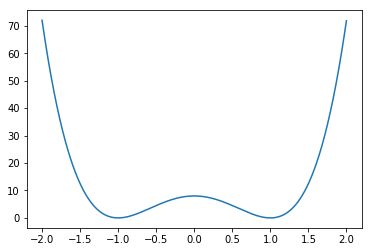

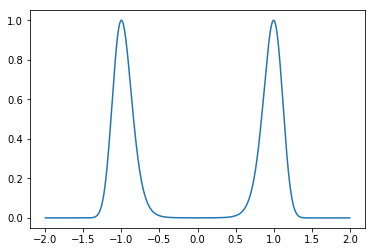

0.644303400211


In [3]:
dx = 1E-3
xx = np.arange(-2,2,dx)
yy = U(xx)
pp = np.exp(-yy)

plt.plot(xx,yy)
plt.show()

plt.plot(xx,pp)
plt.show()

norm_factor = np.sum(pp)*dx
print(norm_factor)

In [21]:
def logl(x):
    return(-U(x))#-np.log(norm_factor))
#    return(np.log(np.exp(-U(x))/norm_factor))

def logp(x):
    return(0.0)

In [30]:
nwalkers = 100
dim = 1
nSteps = 1000

pos = np.zeros((nwalkers,dim))
for jj in range(nwalkers):
    pos[jj,0] = np.random.uniform()

In [31]:
Evidence = []
Temps = np.arange(0,50,10)

for ntemps in Temps:
    print(ntemps)
    betas = np.logspace(0, -5, ntemps, base=10)

    pos0=np.zeros((ntemps,nwalkers,dim))
    for kk in range(ntemps):
        pos0[kk,:,0] = pos[:,0]
    sampler = emcee.PTSampler(ntemps=ntemps,nwalkers=nwalkers,dim = dim,logl=logl,logp=logp,betas=betas)
    sampler.run_mcmc(pos0=pos0,N=nSteps)
    Evidence.append(sampler.thermodynamic_integration_log_evidence())

0
10
20
30
40


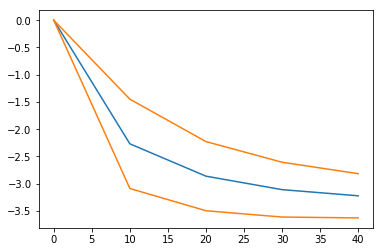

In [32]:
E = np.array(Evidence)
plt.plot(Temps,E[:,0])
plt.plot(Temps,E[:,0]+E[:,1],'C1')
plt.plot(Temps,E[:,0]-E[:,1],'C1')
plt.show()

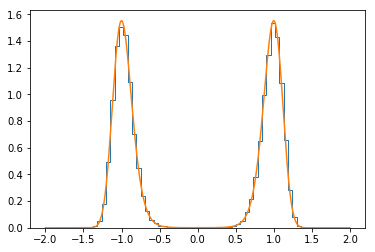

In [7]:
plt.hist(np.ravel(sampler.chain[0,:,-nSteps:,0]),normed=True,histtype='step',bins=50)
plt.plot(xx,np.exp(logl(xx)))
plt.show()
#sampler.chain.shape